In [68]:
import os
import numpy as np
import pandas as pd
from utilities import cal_score

In [69]:
stack_idx = '19'
models = '1-34,36-37'
use_test_kfold = set([2, 7, 8, 12, 13])

In [70]:
no_one = False

### Read CV predictions and test

In [71]:
def parse_models(exp):
    exp_split = exp.split(',')
    idx_models = []
    for e in exp_split:
        if '-' in e:
            n0, n1 = e.split('-')
            idx_models.extend(list(range(int(n0), int(n1)+1, 1)))
        else:
            idx_models.append(int(e))
    return idx_models

In [72]:
idx_models = parse_models(models)
print(idx_models)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]


In [73]:
files_in_output = [f for f in os.listdir('output/') if os.path.isfile('output/'+f)]
files_cv = {idx: [f for f in files_in_output 
                  if f.startswith('model-%02d-' % idx) and f.endswith('cv.csv')][0] 
            for idx in idx_models}
if not no_one:
    files_test_one = {idx: [f for f in files_in_output 
                           if f.startswith('model-%02d-' % idx) and f.endswith('test-one.csv')][0]
                     for idx in idx_models}
files_test_kf = {idx: [f for f in files_in_output 
                       if f.startswith('model-%02d-' % idx) and f.endswith('test-kfold.csv')][0]
                 for idx in idx_models}

In [74]:
for k in files_cv: 
    print('%2d'%k, files_cv[k])
    print('%2d'%k, files_test_kf[k])
    if not no_one: 
        print('%2d'%k, files_test_one[k])

 1 model-01-lgb-cv.csv
 1 model-01-lgb-test-kfold.csv
 1 model-01-lgb-test-one.csv
 2 model-02-keras-search-cv.csv
 2 model-02-keras-search-test-kfold.csv
 2 model-02-keras-search-test-one.csv
 3 model-03-lgb-feats-selection-cv.csv
 3 model-03-lgb-feats-selection-test-kfold.csv
 3 model-03-lgb-feats-selection-test-one.csv
 4 model-04-lgb-PCA-cv.csv
 4 model-04-lgb-PCA-test-kfold.csv
 4 model-04-lgb-PCA-test-one.csv
 5 model-05-lgb-wo-per-area-cv.csv
 5 model-05-lgb-wo-per-area-test-kfold.csv
 5 model-05-lgb-wo-per-area-test-one.csv
 6 model-06-lgb-lr0.001-cv.csv
 6 model-06-lgb-lr0.001-test-kfold.csv
 6 model-06-lgb-lr0.001-test-one.csv
 7 model-07-keras-embedding-cv.csv
 7 model-07-keras-embedding-test-kfold.csv
 7 model-07-keras-embedding-test-one.csv
 8 model-08-keras-search-long-cv.csv
 8 model-08-keras-search-long-test-kfold.csv
 8 model-08-keras-search-long-test-one.csv
 9 model-09-lgb-feats-selection-75-cv.csv
 9 model-09-lgb-feats-selection-75-test-kfold.csv
 9 model-09-lgb-fea

#### Load area

In [75]:
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

In [76]:
cv = df_train[['building_id', 'building_area', 'total_price']]
test = df_test[['building_id', 'building_area']]

print('CV predictions:')
for i, idx_model in enumerate(idx_models):
    f = files_cv[idx_model]
    print('No. {} file: {}'.format(i, f))
    df = pd.read_csv('output/'+f)
    
    cv = pd.merge(cv, df[['building_id', 'total_price_predict']], on='building_id')
    
    cv = cv.rename(columns = {'total_price_predict': 'pred_{}'.format(idx_model)})
    cv[f'log_pred_{idx_model}'] = np.log1p(cv[f'pred_{idx_model}'])
    cv[f'log_parea_pred_{idx_model}'] = np.log1p( cv[f'pred_{idx_model}'] / cv['building_area'] )

cv['log_total_price'] = np.log1p(cv['total_price'])
cv['log_parea_total_price'] = np.log1p( cv['total_price'] / cv['building_area'] )

if not no_one:
    print('Test predictions:')
    for i, idx in enumerate(idx_models):
        f = files_test_kf[idx] if idx in use_test_kfold else files_test_one[idx]
        print('No. {} file: {}'.format(i, f))
        df = pd.read_csv('output/'+f)

        test = pd.merge(test, df[['building_id','total_price']], on='building_id')

        test = test.rename(columns = {'total_price': 'pred_{}'.format(idx)})
        test[f'log_pred_{idx}'] = np.log1p(test[f'pred_{idx}'])
        test[f'log_parea_pred_{idx}'] = np.log1p( test[f'pred_{idx}'] / test['building_area'] )

CV predictions:
No. 0 file: model-01-lgb-cv.csv
No. 1 file: model-02-keras-search-cv.csv
No. 2 file: model-03-lgb-feats-selection-cv.csv
No. 3 file: model-04-lgb-PCA-cv.csv
No. 4 file: model-05-lgb-wo-per-area-cv.csv
No. 5 file: model-06-lgb-lr0.001-cv.csv
No. 6 file: model-07-keras-embedding-cv.csv
No. 7 file: model-08-keras-search-long-cv.csv
No. 8 file: model-09-lgb-feats-selection-75-cv.csv
No. 9 file: model-10-lgb-feats-selection-75-lr-0.001-cv.csv
No. 10 file: model-11-rf-cv.csv
No. 11 file: model-12-predict-keras-search-prelu-cv.csv
No. 12 file: model-13-predict-keras-he_uni-cv.csv
No. 13 file: model-14-lgb-feats-selection-75-lr-0.001-rand-cv.csv
No. 14 file: model-15-lgb-feats-selection-75-lr-0.001-rand323-cv.csv
No. 15 file: model-16-lgb-feats-selection-68-lr-0.001-mix5-cv.csv
No. 16 file: model-17-lgb-feats-selection-70-lr-0.001-mix5-cv.csv
No. 17 file: model-18-lgb-feats-selection-70-lr-0.001-p5-cv.csv
No. 18 file: model-19-lgb-search-bins-lr-0.0005-cv.csv
No. 19 file: model

In [77]:
cv.head()

,building_id,building_area,total_price,pred_1,log_pred_1,log_parea_pred_1,pred_2,log_pred_2,log_parea_pred_2,pred_3,...,log_pred_34,log_parea_pred_34,pred_36,log_pred_36,log_parea_pred_36,pred_37,log_pred_37,log_parea_pred_37,log_total_price,log_parea_total_price
0,e3mMIMR3JJqCaXz1,3.418175,6.476038e+05,6.331552e+05,13.358472,12.129369,717209.94,13.483125,12.254022,6.656891e+05,...,13.360546,12.131443,6.245441e+05,13.344779,12.115676,6.319899e+05,13.356630,12.127527,13.381036,12.151933
1,LgwzgklNvy4QCtq5,4.041309,3.321452e+06,3.064324e+06,14.935338,13.538770,2899842.20,14.880167,13.483600,3.079196e+06,...,14.934792,13.538225,3.042045e+06,14.928041,13.531473,3.142342e+06,14.960479,13.563912,15.015913,13.619345
2,ucIR2NLLsC3T650L,5.584279,9.570885e+06,9.827776e+06,16.100723,14.380769,9766813.00,16.094501,14.374546,9.814852e+06,...,16.111430,14.391475,9.818275e+06,16.099756,14.379801,9.946933e+06,16.112775,14.392820,16.074236,14.354282
3,jre1pJhcQj91Kdky,13.563031,1.421501e+07,1.255350e+07,16.345510,13.738164,12699800.00,16.357097,13.749750,1.255981e+07,...,16.360720,13.753373,1.264691e+07,16.352924,13.745577,1.295773e+07,16.377203,13.769857,16.469809,13.862462
4,rQpYpY9nRG7X5mmr,4.688108,7.627120e+05,1.215194e+06,14.010415,12.465389,2012610.50,14.514944,12.969916,1.128419e+06,...,13.833961,12.288935,9.305770e+05,13.743561,12.198536,9.859947e+05,13.801407,12.256382,13.544637,11.999613


In [78]:
test.head()

,building_id,building_area,pred_1,log_pred_1,log_parea_pred_1,pred_2,log_pred_2,log_parea_pred_2,pred_3,log_pred_3,...,log_parea_pred_33,pred_34,log_pred_34,log_parea_pred_34,pred_36,log_pred_36,log_parea_pred_36,pred_37,log_pred_37,log_parea_pred_37
0,X5gsdTWGS3W7JJQB,3.418175,1.526912e+07,16.541343,15.312236,12470072.0,16.338842,15.109735,1.531685e+07,16.544464,...,15.177853,1.265085e+07,16.353235,15.124128,1.298618e+07,16.379396,15.150290,1.304845e+07,16.384180,15.155073
1,BTshNOJyKHnT2YIT,7.726227,3.924241e+06,15.182684,13.138065,3916552.2,15.180723,13.136104,3.977095e+06,15.196062,...,13.129452,3.890897e+06,15.174151,13.129532,3.897411e+06,15.175823,13.131204,3.897545e+06,15.175858,13.131239
2,dhdymr0lV8N5kZOT,12.170581,1.096127e+07,16.209879,13.710858,11912735.0,16.293119,13.794098,1.084967e+07,16.199646,...,13.676769,1.078313e+07,16.193493,13.694473,1.049745e+07,16.166643,13.667623,1.035078e+07,16.152573,13.653552
3,VEwyGGMcD56w5BOc,2.252256,6.155550e+06,15.632865,14.820933,5940670.0,15.597333,14.785400,6.015238e+06,15.609807,...,14.815015,6.080412e+06,15.620583,14.808651,6.139949e+06,15.630327,14.818395,6.120593e+06,15.627170,14.815237
4,wmUeMoJZfsqaSX9b,5.813985,1.062995e+06,13.876602,12.116340,1088488.1,13.900301,12.140039,1.027248e+06,13.842395,...,12.159895,1.092040e+06,13.903559,12.143297,1.106728e+06,13.916919,12.156657,1.098338e+06,13.909310,12.149048


### Check models scores

In [79]:
scores_models = {idx_model: cal_score(cv['total_price'], cv[f'pred_{idx_model}'])
                 for idx_model in idx_models}

In [80]:
for i, (idx_model, s) in enumerate(scores_models.items()):
    print('%2d'%i, 'model-%02d'%idx_model, '%.6f'%s)

 0 model-01 5870.873059
 1 model-02 5400.852164
 2 model-03 5877.873452
 3 model-04 5713.867808
 4 model-05 5724.869598
 5 model-06 5886.873769
 6 model-07 5171.836449
 7 model-08 5514.858826
 8 model-09 5872.873118
 9 model-10 5897.873845
10 model-11 5075.838018
11 model-12 5486.856963
12 model-13 5506.858055
13 model-14 5908.873901
14 model-15 5900.873836
15 model-16 5907.874126
16 model-17 5905.874165
17 model-18 5908.874297
18 model-19 5911.874156
19 model-20 5908.874040
20 model-21 5758.870702
21 model-22 5752.870671
22 model-23 5852.871357
23 model-24 5866.873835
24 model-25 5908.874238
25 model-26 5918.873998
26 model-27 5892.873194
27 model-28 5901.874202
28 model-29 5884.873848
29 model-30 5864.872101
30 model-31 5783.868923
31 model-32 5930.875106
32 model-33 5976.875715
33 model-34 5942.875172
34 model-36 5989.876236
35 model-37 5980.875836


### Search subset model mean 

In [81]:
def get_prefix(is_per_area, is_log):
    if is_log:
        if is_per_area:
            col_prefix = 'log_parea_pred'
        else:
            col_prefix = 'log_pred'
    else:
        if is_per_area:
            raise 'Not support'
        else:
            col_prefix = 'pred'
    return col_prefix

In [82]:
def mean_subset(df, idx_models, is_per_area, is_log):
    col_prefix = get_prefix(is_per_area, is_log)
    cols_models = [col_prefix+'_'+str(i) for i in idx_models]
    return df[cols_models].mean(axis=1)

In [83]:
def predict_mean_subset(df, idx_models, is_per_area, is_log):
    y_pred = mean_subset(df, idx_models, is_per_area, is_log)
    y_pred_final = y_pred
    if is_log:
        y_pred_final = np.expm1(y_pred_final)
    if is_per_area:
        y_pred_final = y_pred_final * df['building_area']
    return y_pred_final

In [84]:
def search_mean_subset(cv, idx_models, is_per_area, is_log):
    idx_models_subset = idx_models.copy()
    result_list = []
    y_pred_cv = predict_mean_subset(cv, idx_models_subset, is_per_area=is_per_area, is_log=is_log)
    score = cal_score(cv['total_price'], y_pred_cv)
    print('%.6f'%score, idx_models_subset)
    result_list.append([score, idx_models_subset])
    while len(idx_models_subset) > 1:
        print('N models remained:', len(idx_models_subset))
        result_list_subset = []
        for i_rm in range(len(idx_models_subset)):
            idx_models_subset_next = idx_models_subset[:i_rm]+idx_models_subset[i_rm+1:]
            y_pred_cv = predict_mean_subset(cv, idx_models_subset_next, is_per_area=is_per_area, is_log=is_log)
            score = cal_score(cv['total_price'], y_pred_cv)
            print('%.6f'%score, idx_models_subset_next)
            result_list_subset.append([score, idx_models_subset_next])
        result_list.extend(result_list_subset)
        result_list_subset.sort(key=lambda x: x[0], reverse=True)
        print('Best of the round:', result_list_subset[0][0], result_list_subset[0][1])
        idx_models_subset = result_list_subset[0][1]
        print()
    result_list.sort(key=lambda x: x[0], reverse=True)
    return result_list

#### Log mean

In [85]:
result_list_log = search_mean_subset(cv, idx_models, is_per_area=False, is_log=True)

5961.875722 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
N models remained: 36
5959.875746 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5959.875668 [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5962.875733 [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5963.875739 [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5963.875686 [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5962.875740 [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 

5972.876037 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5972.876042 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 36, 37]
5973.876038 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5970.876007 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 36, 37]
5971.876007 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 36, 37]
5970.875991 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 36, 37]
5968.875943 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 36, 37]
5968.875990 [1, 2, 3

5973.876093 [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5974.876099 [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5973.876102 [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5974.876050 [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5974.876049 [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5972.876070 [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5972.876055 [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5974.876094 [1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 

5973.876162 [2, 3, 5, 6, 7, 8, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5974.876169 [2, 3, 5, 6, 7, 8, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5976.876172 [2, 3, 5, 6, 7, 8, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5975.876118 [2, 3, 5, 6, 7, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5976.876117 [2, 3, 5, 6, 7, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5972.876140 [2, 3, 5, 6, 7, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5971.876124 [2, 3, 5, 6, 7, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5974.876164 [2, 3, 5, 6, 7, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 

5981.876176 [2, 3, 5, 6, 8, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5980.876143 [2, 3, 5, 6, 8, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 36, 37]
5976.876141 [2, 3, 5, 6, 8, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 36, 37]
5981.876123 [2, 3, 5, 6, 8, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 36, 37]
5977.876066 [2, 3, 5, 6, 8, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 36, 37]
5981.876122 [2, 3, 5, 6, 8, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37]
5977.876049 [2, 3, 5, 6, 8, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37]
5977.876032 [2, 3, 5, 6, 8, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36]
Best of the round: 5983.8761845042145 [2

5982.876230 [2, 5, 6, 8, 12, 13, 14, 15, 18, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5980.876252 [2, 5, 6, 8, 12, 13, 14, 15, 18, 19, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5983.876230 [2, 5, 6, 8, 12, 13, 14, 15, 18, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5983.876278 [2, 5, 6, 8, 12, 13, 14, 15, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5984.876289 [2, 5, 6, 8, 12, 13, 14, 15, 18, 19, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5982.876274 [2, 5, 6, 8, 12, 13, 14, 15, 18, 19, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5984.876279 [2, 5, 6, 8, 12, 13, 14, 15, 18, 19, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 36, 37]
5984.876274 [2, 5, 6, 8, 12, 13, 14, 15, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5981.876240 [2, 5, 6, 8, 12, 13, 14, 15, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 36, 37]
5981.876240 [2, 5, 

5979.876385 [2, 5, 8, 12, 13, 14, 15, 18, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5982.876390 [2, 5, 8, 12, 13, 14, 15, 18, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 36, 37]
5984.876386 [2, 5, 8, 12, 13, 14, 15, 18, 21, 22, 23, 24, 25, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5986.876352 [2, 5, 8, 12, 13, 14, 15, 18, 21, 22, 23, 24, 25, 27, 28, 29, 31, 32, 33, 34, 36, 37]
5979.876353 [2, 5, 8, 12, 13, 14, 15, 18, 21, 22, 23, 24, 25, 27, 28, 29, 30, 32, 33, 34, 36, 37]
5979.876321 [2, 5, 8, 12, 13, 14, 15, 18, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 33, 34, 36, 37]
5975.876252 [2, 5, 8, 12, 13, 14, 15, 18, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 36, 37]
5978.876319 [2, 5, 8, 12, 13, 14, 15, 18, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 36, 37]
5975.876232 [2, 5, 8, 12, 13, 14, 15, 18, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 37]
5975.876208 [2, 5, 8, 12, 13, 14, 15, 18, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 36]
Best of the round: 5

5984.876406 [2, 5, 12, 13, 14, 18, 21, 22, 23, 24, 25, 27, 29, 31, 32, 33, 36, 37]
5984.876302 [2, 5, 12, 13, 14, 18, 21, 22, 23, 24, 25, 27, 29, 31, 32, 33, 34, 37]
5979.876273 [2, 5, 12, 13, 14, 18, 21, 22, 23, 24, 25, 27, 29, 31, 32, 33, 34, 36]
Best of the round: 5992.876450895986 [2, 12, 13, 14, 18, 21, 22, 23, 24, 25, 27, 29, 31, 32, 33, 34, 36, 37]

N models remained: 18
5984.876436 [12, 13, 14, 18, 21, 22, 23, 24, 25, 27, 29, 31, 32, 33, 34, 36, 37]
5980.876467 [2, 13, 14, 18, 21, 22, 23, 24, 25, 27, 29, 31, 32, 33, 34, 36, 37]
5980.876465 [2, 12, 14, 18, 21, 22, 23, 24, 25, 27, 29, 31, 32, 33, 34, 36, 37]
5986.876502 [2, 12, 13, 18, 21, 22, 23, 24, 25, 27, 29, 31, 32, 33, 34, 36, 37]
5989.876489 [2, 12, 13, 14, 21, 22, 23, 24, 25, 27, 29, 31, 32, 33, 34, 36, 37]
5987.876419 [2, 12, 13, 14, 18, 22, 23, 24, 25, 27, 29, 31, 32, 33, 34, 36, 37]
5985.876418 [2, 12, 13, 14, 18, 21, 23, 24, 25, 27, 29, 31, 32, 33, 34, 36, 37]
5990.876447 [2, 12, 13, 14, 18, 21, 22, 24, 25, 27, 29, 31

5982.876411 [2, 12, 14, 21, 22, 23, 29, 32, 33, 34, 36]
Best of the round: 5997.876655366366 [2, 12, 14, 22, 23, 29, 32, 33, 34, 36, 37]

N models remained: 11
5985.876666 [12, 14, 22, 23, 29, 32, 33, 34, 36, 37]
5980.876697 [2, 14, 22, 23, 29, 32, 33, 34, 36, 37]
5990.876716 [2, 12, 22, 23, 29, 32, 33, 34, 36, 37]
5990.876531 [2, 12, 14, 23, 29, 32, 33, 34, 36, 37]
5991.876631 [2, 12, 14, 22, 29, 32, 33, 34, 36, 37]
5991.876700 [2, 12, 14, 22, 23, 32, 33, 34, 36, 37]
5992.876617 [2, 12, 14, 22, 23, 29, 33, 34, 36, 37]
5987.876494 [2, 12, 14, 22, 23, 29, 32, 34, 36, 37]
5990.876612 [2, 12, 14, 22, 23, 29, 32, 33, 36, 37]
5983.876452 [2, 12, 14, 22, 23, 29, 32, 33, 34, 37]
5982.876400 [2, 12, 14, 22, 23, 29, 32, 33, 34, 36]
Best of the round: 5992.876616603871 [2, 12, 14, 22, 23, 29, 33, 34, 36, 37]

N models remained: 10
5987.876704 [12, 14, 22, 23, 29, 33, 34, 36, 37]
5979.876733 [2, 14, 22, 23, 29, 33, 34, 36, 37]
5986.876654 [2, 12, 22, 23, 29, 33, 34, 36, 37]
5987.876468 [2, 12, 14

In [86]:
display(result_list_log[:10])

[[5998.876851691454, [12, 23, 33, 34, 36, 37]],
 [5998.876789297302, [12, 23, 33, 36, 37]],
 [5997.876745438891, [12, 14, 23, 33, 34, 36, 37]],
 [5997.876736475195, [12, 14, 23, 33, 36, 37]],
 [5997.876655366366, [2, 12, 14, 22, 23, 29, 32, 33, 34, 36, 37]],
 [5996.876734627638, [12, 33, 34, 36, 37]],
 [5996.876682955532, [12, 23, 34, 36, 37]],
 [5995.876597596747, [12, 14, 23, 34, 36, 37]],
 [5995.876308298566, [33, 36, 37]],
 [5994.876656363241, [2, 12, 14, 21, 22, 23, 29, 32, 33, 34, 36, 37]]]

In [87]:
best_models_subset_log = result_list_log[0][1]
print('Best score and subset:', '%.6f'%result_list_log[0][0], best_models_subset_log)
for idx_model in best_models_subset_log:
    print('model-%02d'%idx_model, '%.6f'%scores_models[idx_model])

Best score and subset: 5998.876852 [12, 23, 33, 34, 36, 37]
model-12 5486.856963
model-23 5852.871357
model-33 5976.875715
model-34 5942.875172
model-36 5989.876236
model-37 5980.875836


In [88]:
len(best_models_subset_log)

6

In [89]:
# per area or not for the mean ensemble model are the same
#result_list_per_area_log = search_mean_subset(cv, idx_models, is_per_area=True, is_log=True)
#result_list_per_area_log

#### Linear mean

In [90]:
result_list_none = search_mean_subset(cv, idx_models, is_per_area=False, is_log=False)

5962.874954 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
N models remained: 36
5961.874957 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5955.874964 [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5963.874945 [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5963.874962 [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5963.874908 [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5960.874951 [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 

5970.875277 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5971.875276 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5969.875296 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5969.875278 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5970.875312 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5971.875320 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5970.875309 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 36, 37]
5969.875313 [1, 2, 3

5973.875622 [1, 2, 3, 4, 5, 6, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5967.875598 [1, 2, 3, 4, 5, 6, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5965.875607 [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5973.875619 [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5972.875622 [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5972.875616 [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5973.875615 [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5973.875610 [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 

5974.875680 [2, 3, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5979.875680 [2, 3, 5, 6, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5968.875660 [2, 3, 5, 6, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5970.875669 [2, 3, 5, 6, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5977.875678 [2, 3, 5, 6, 8, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5976.875681 [2, 3, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5977.875675 [2, 3, 5, 6, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5978.875673 [2, 3, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32,

5975.875730 [2, 3, 5, 6, 8, 9, 12, 13, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5976.875732 [2, 3, 5, 6, 8, 9, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5976.875727 [2, 3, 5, 6, 8, 9, 12, 13, 14, 15, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5976.875725 [2, 3, 5, 6, 8, 9, 12, 13, 14, 15, 16, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5977.875720 [2, 3, 5, 6, 8, 9, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5976.875727 [2, 3, 5, 6, 8, 9, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5976.875687 [2, 3, 5, 6, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5975.875686 [2, 3, 5, 6, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5976.875703 [2, 3, 5, 6, 8, 9, 12, 13, 14, 15, 1

5976.875700 [2, 3, 5, 8, 9, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 33, 34, 36, 37]
5975.875641 [2, 3, 5, 8, 9, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 36, 37]
5976.875698 [2, 3, 5, 8, 9, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 36, 37]
5976.875623 [2, 3, 5, 8, 9, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 37]
5975.875604 [2, 3, 5, 8, 9, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36]
Best of the round: 5981.87575663109 [2, 5, 8, 9, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]

N models remained: 26
5971.875821 [5, 8, 9, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5981.875734 [2, 8, 9, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37]
5976.875764 [2, 5, 9, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23

5977.875766 [2, 5, 8, 9, 12, 13, 14, 15, 17, 19, 21, 22, 23, 24, 25, 26, 28, 30, 32, 33, 34, 36, 37]
5979.875732 [2, 5, 8, 9, 12, 13, 14, 15, 17, 19, 21, 22, 23, 24, 25, 26, 28, 30, 31, 33, 34, 36, 37]
5975.875667 [2, 5, 8, 9, 12, 13, 14, 15, 17, 19, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32, 34, 36, 37]
5979.875730 [2, 5, 8, 9, 12, 13, 14, 15, 17, 19, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32, 33, 36, 37]
5977.875647 [2, 5, 8, 9, 12, 13, 14, 15, 17, 19, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 37]
5974.875625 [2, 5, 8, 9, 12, 13, 14, 15, 17, 19, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 36]
Best of the round: 5983.8757632231545 [2, 5, 8, 9, 12, 13, 14, 15, 17, 19, 21, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 36, 37]

N models remained: 23
5982.875868 [5, 8, 9, 12, 13, 14, 15, 17, 19, 21, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 36, 37]
5983.875717 [2, 8, 9, 12, 13, 14, 15, 17, 19, 21, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 36, 37]
5982.875799 [2, 5, 9, 12, 13, 14, 15, 17, 19, 21

5983.875745 [2, 5, 8, 12, 13, 15, 17, 19, 23, 24, 26, 28, 30, 31, 32, 33, 34, 36, 37]
5982.875762 [2, 5, 8, 12, 13, 15, 17, 19, 23, 24, 25, 28, 30, 31, 32, 33, 34, 36, 37]
5984.875746 [2, 5, 8, 12, 13, 15, 17, 19, 23, 24, 25, 26, 30, 31, 32, 33, 34, 36, 37]
5980.875721 [2, 5, 8, 12, 13, 15, 17, 19, 23, 24, 25, 26, 28, 31, 32, 33, 34, 36, 37]
5984.875721 [2, 5, 8, 12, 13, 15, 17, 19, 23, 24, 25, 26, 28, 30, 32, 33, 34, 36, 37]
5980.875674 [2, 5, 8, 12, 13, 15, 17, 19, 23, 24, 25, 26, 28, 30, 31, 33, 34, 36, 37]
5979.875599 [2, 5, 8, 12, 13, 15, 17, 19, 23, 24, 25, 26, 28, 30, 31, 32, 34, 36, 37]
5982.875672 [2, 5, 8, 12, 13, 15, 17, 19, 23, 24, 25, 26, 28, 30, 31, 32, 33, 36, 37]
5980.875576 [2, 5, 8, 12, 13, 15, 17, 19, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 37]
5980.875549 [2, 5, 8, 12, 13, 15, 17, 19, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 36]
Best of the round: 5985.875886912262 [2, 5, 8, 12, 15, 17, 19, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 36, 37]

N models remained: 19
5978.8

5985.876158 [5, 8, 12, 15, 23, 24, 25, 28, 30, 33, 34, 36, 37]
5985.876056 [5, 8, 12, 15, 23, 24, 25, 28, 30, 32, 34, 36, 37]
5984.876154 [5, 8, 12, 15, 23, 24, 25, 28, 30, 32, 33, 36, 37]
5987.876019 [5, 8, 12, 15, 23, 24, 25, 28, 30, 32, 33, 34, 37]
5983.875980 [5, 8, 12, 15, 23, 24, 25, 28, 30, 32, 33, 34, 36]
Best of the round: 5992.876245264088 [5, 8, 12, 15, 23, 24, 25, 30, 32, 33, 34, 36, 37]

N models remained: 13
5984.876168 [8, 12, 15, 23, 24, 25, 30, 32, 33, 34, 36, 37]
5980.876267 [5, 12, 15, 23, 24, 25, 30, 32, 33, 34, 36, 37]
5980.876339 [5, 8, 15, 23, 24, 25, 30, 32, 33, 34, 36, 37]
5991.876299 [5, 8, 12, 23, 24, 25, 30, 32, 33, 34, 36, 37]
5986.876290 [5, 8, 12, 15, 24, 25, 30, 32, 33, 34, 36, 37]
5989.876218 [5, 8, 12, 15, 23, 25, 30, 32, 33, 34, 36, 37]
5985.876291 [5, 8, 12, 15, 23, 24, 30, 32, 33, 34, 36, 37]
5988.876269 [5, 8, 12, 15, 23, 24, 25, 32, 33, 34, 36, 37]
5987.876202 [5, 8, 12, 15, 23, 24, 25, 30, 33, 34, 36, 37]
5982.876098 [5, 8, 12, 15, 23, 24, 25, 30

In [91]:
display(result_list_none[:10])

[[6000.8763905783035, [12, 23, 32, 33, 36, 37]],
 [5998.876409298616, [12, 23, 32, 33, 34, 36, 37]],
 [5998.876267905013, [12, 23, 33, 36, 37]],
 [5996.876399248247, [12, 23, 33, 34, 36, 37]],
 [5996.876264595087, [5, 8, 12, 23, 25, 30, 32, 33, 34, 36, 37]],
 [5995.876341867636, [12, 23, 25, 32, 33, 36, 37]],
 [5995.876293867196, [33, 36, 37]],
 [5995.876257241021, [12, 23, 32, 34, 36, 37]],
 [5994.876349047643, [12, 23, 25, 33, 34, 36, 37]],
 [5994.876317870345, [12, 32, 33, 34, 36, 37]]]

In [92]:
best_models_subset_none = result_list_none[0][1]
print('Best score and subset:', '%.6f'%result_list_none[0][0], best_models_subset_none)
for idx_model in best_models_subset_none:
    print('model-%02d'%idx_model, '%.6f'%scores_models[idx_model])

Best score and subset: 6000.876391 [12, 23, 32, 33, 36, 37]
model-12 5486.856963
model-23 5852.871357
model-32 5930.875106
model-33 5976.875715
model-36 5989.876236
model-37 5980.875836


### Compute submission for mean log

In [93]:
import matplotlib.pyplot as plt

In [94]:
print('Predict for mean log with', best_models_subset_log)
test['total_price'] = predict_mean_subset(test, best_models_subset_log, is_per_area=False, is_log=True)

Predict for mean log with [12, 23, 33, 34, 36, 37]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


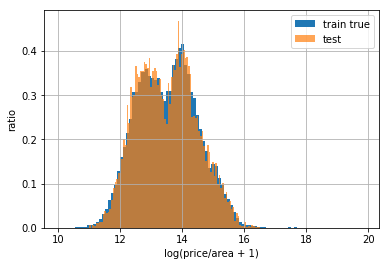

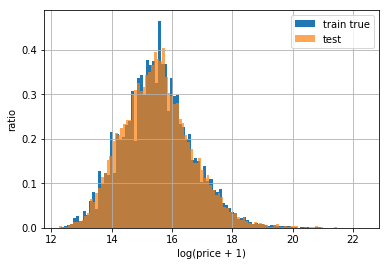

In [95]:
plt.hist(cv['log_parea_total_price'], bins=100, label='train true', normed=True)
plt.hist(np.log1p(test['total_price'] / test['building_area']), bins=100, label='test',
         normed=True, alpha=0.7)
plt.xlabel('log(price/area + 1)'); plt.ylabel('ratio')
plt.legend(); plt.grid(); plt.show()

plt.hist(cv['log_total_price'], bins=100, label='train true', normed=True)
plt.hist(np.log1p(test['total_price']), bins=100, label='test', normed=True, alpha=0.7)
plt.xlabel('log(price + 1)'); plt.ylabel('ratio')
plt.legend(); plt.grid(); plt.show()

plt.hist(np.log1p(cv['building_area']), bins=100, label='train', normed=True)
plt.hist(np.log1p(test['building_area']), bins=100, label='test', normed=True, alpha=0.7)
plt.xlabel('log(building_area + 1)'); plt.ylabel('ratio'); plt.yscale('log')
plt.legend(); plt.grid(); plt.show()

In [96]:
test[['building_id', 'total_price']].check()

,building_id,total_price
0,X5gsdTWGS3W7JJQB,1.316080e+07
1,BTshNOJyKHnT2YIT,3.884011e+06
2,dhdymr0lV8N5kZOT,1.120520e+07
3,VEwyGGMcD56w5BOc,6.053963e+06
4,wmUeMoJZfsqaSX9b,1.093712e+06
9995,UEeCDaAJzPwdKKKA,1.205288e+06
9996,i0fgbPaQsDWs7Q87,4.783963e+07
9997,YunNwAhcqkf6YclI,1.109812e+06
9998,A2NotxtRY9MYoWMl,2.986649e+06
9999,kKvgBXiA50gRmQhP,3.145255e+06


shape = (10000, 2)


In [97]:
output_filename = 'output/stack_meanlog_{}_{}.csv'.format(stack_idx, models)
print('Output file to:', output_filename)

Output file to: output/stack_meanlog_19_1-34,36-37.csv


In [98]:
test[['building_id', 'total_price']].to_csv(output_filename, index=False)

In [99]:
pd.read_csv(output_filename).check()

,building_id,total_price
0,X5gsdTWGS3W7JJQB,1.316080e+07
1,BTshNOJyKHnT2YIT,3.884011e+06
2,dhdymr0lV8N5kZOT,1.120520e+07
3,VEwyGGMcD56w5BOc,6.053963e+06
4,wmUeMoJZfsqaSX9b,1.093712e+06
9995,UEeCDaAJzPwdKKKA,1.205288e+06
9996,i0fgbPaQsDWs7Q87,4.783963e+07
9997,YunNwAhcqkf6YclI,1.109812e+06
9998,A2NotxtRY9MYoWMl,2.986649e+06
9999,kKvgBXiA50gRmQhP,3.145255e+06


shape = (10000, 2)


### Compute submission for linear mean

In [100]:
import matplotlib.pyplot as plt

In [101]:
print('Predict for liear mean with', best_models_subset_none)
test['total_price'] = predict_mean_subset(test, best_models_subset_none, is_per_area=False, is_log=False)

Predict for liear mean with [12, 23, 32, 33, 36, 37]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


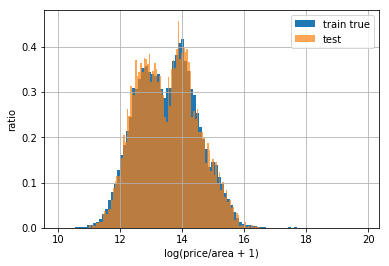

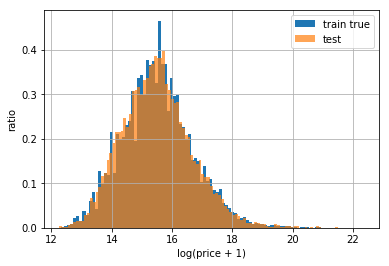

In [102]:
plt.hist(cv['log_parea_total_price'], bins=100, label='train true', normed=True)
plt.hist(np.log1p(test['total_price'] / test['building_area']), bins=100, label='test',
         normed=True, alpha=0.7)
plt.xlabel('log(price/area + 1)'); plt.ylabel('ratio')
plt.legend(); plt.grid(); plt.show()

plt.hist(cv['log_total_price'], bins=100, label='train true', normed=True)
plt.hist(np.log1p(test['total_price']), bins=100, label='test', normed=True, alpha=0.7)
plt.xlabel('log(price + 1)'); plt.ylabel('ratio')
plt.legend(); plt.grid(); plt.show()

In [103]:
test[['building_id', 'total_price']].check()

,building_id,total_price
0,X5gsdTWGS3W7JJQB,1.322957e+07
1,BTshNOJyKHnT2YIT,3.884760e+06
2,dhdymr0lV8N5kZOT,1.125073e+07
3,VEwyGGMcD56w5BOc,6.048076e+06
4,wmUeMoJZfsqaSX9b,1.094051e+06
9995,UEeCDaAJzPwdKKKA,1.205132e+06
9996,i0fgbPaQsDWs7Q87,4.790438e+07
9997,YunNwAhcqkf6YclI,1.109518e+06
9998,A2NotxtRY9MYoWMl,2.985298e+06
9999,kKvgBXiA50gRmQhP,3.148581e+06


shape = (10000, 2)


In [104]:
output_filename = 'output/stack_mean_{}_{}.csv'.format(stack_idx, models)
print('Output file to:', output_filename)

Output file to: output/stack_mean_19_1-34,36-37.csv


In [105]:
test[['building_id', 'total_price']].to_csv(output_filename, index=False)

In [106]:
pd.read_csv(output_filename).check()

,building_id,total_price
0,X5gsdTWGS3W7JJQB,1.322957e+07
1,BTshNOJyKHnT2YIT,3.884760e+06
2,dhdymr0lV8N5kZOT,1.125073e+07
3,VEwyGGMcD56w5BOc,6.048076e+06
4,wmUeMoJZfsqaSX9b,1.094051e+06
9995,UEeCDaAJzPwdKKKA,1.205132e+06
9996,i0fgbPaQsDWs7Q87,4.790438e+07
9997,YunNwAhcqkf6YclI,1.109518e+06
9998,A2NotxtRY9MYoWMl,2.985298e+06
9999,kKvgBXiA50gRmQhP,3.148581e+06


shape = (10000, 2)
